In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Problem 1: Classification of handwritten digits

In [67]:
# load the data
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Theory/master/Data/digits.csv'
data = pd.read_csv(url)
data.head(5) # display first 5 rows of the dataset

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [71]:
X = data.iloc[:,0:784].to_numpy() # pixels
y = data['label'].to_numpy()

This dataset contains 5,000 images, and each image has 784 features. 
This is because each image is 28×28  pixels, and each feature simply represents one pixel's intensity, from 0 (white) to 1 (black).

In [72]:
X.shape

(5000, 784)

Let's take a peek at one digit from the dataset. All we need to do is grab a row of $X$, reshape it to a  28×28  array, and display it using imshow()

(-0.5, 27.5, 27.5, -0.5)

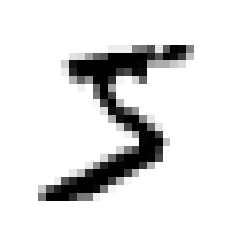

In [73]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = 'binary')
plt.axis('off')

This looks like a 5, and indeed that's what the label tells us

In [74]:
y[0]

5

The following figure shows a few more images from the dataset

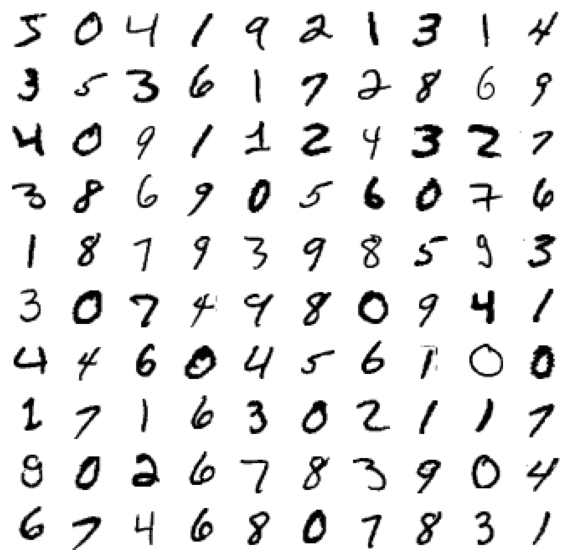

In [80]:
plt.figure(figsize=(10,10))
for i in range(100):
    digit = X[i]
    digit_image = digit.reshape(28,28)
    plt.subplot(10,10,i+1)
    plt.imshow(digit_image,cmap = 'binary')
    plt.axis('off')

In [104]:
y_0 = np.zeros(len(y))
y_0[y==0]=1
100*y_0.sum()/len(y_0)

9.58

## Gradient Descent

In [122]:
# add bias
X = np.c_[np.ones(len(y)),X]

In [120]:
def linregression_GD(X,y,learning_rate, momentum=0, n_epochs = 100, return_MSE=False, test_data = None, theta_start = None):
    '''
    linear regression with Gradient Descent
    
    INPUT: 
    - the matrix X
    - the vector y
    - learning rate
    - momentum: momentum coefficient (default 0)
    - epochs: number of Gradient Descent iterations (defualt 100)
    - return_MSE: if True, it returs the mse at each iteration (default False)
    - test_data: data (X_test,y_test) for monitoring overfitting
    - theta_start: initial theta vector (if None, random)
    
    OUTPUT:
    - the vector theta
    - MSE: error at each iteration
    '''
    m,n = X.shape # size of data set, number of features
    
    if theta_start is None:
        theta = np.random.randn(n) # random initialization
    else:
        theta = theta_start
    
    # initialize MSE vector (only if retur_MSE = True)
    if return_MSE:
        MSE = np.zeros(n_epochs)
    
    # initialize MSE_test vector (only if test_data not None)
    if test_data:
        X_test,y_test = test_data
        m_test = len(y_test)
        MSE_test = np.zeros(n_epochs)
    
    # initialize directions
    d_current = np.zeros(n)
    d_previous = np.zeros(n)
    
    # gradient descent iterations
    for epoch in range(n_epochs):
        gradient = (2/m)*X.T.dot(X.dot(theta)-y) # gradient of the mse function
        
        d_current = gradient + momentum*d_previous  # new direction
        theta = theta - learning_rate*d_current # update the vector theta
        
        d_previous = d_current # update direction
        
        # compute mean squared error (only if return_MSE = True)
        if return_MSE:
            MSE[epoch] = np.linalg.norm(y-X.dot(theta))**2/m
        # compute mean squared error on test set (only if test_data is not None)
        if test_data:
            MSE_test[epoch] = np.linalg.norm(y_test-X_test.dot(theta))**2/m_test
    
    results = {}
    results['coeff'] = theta
    if return_MSE:
        results['error'] = MSE
    if test_data:
        results['test_error'] = MSE_test
    return results

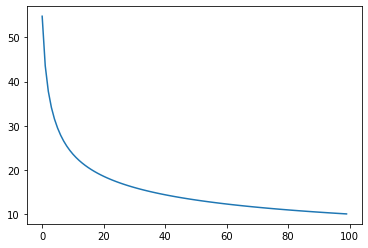

In [123]:
results = linregression_GD(X,y,
                              learning_rate = 0.02,
                              momentum=0,
                              n_epochs=100,
                              return_MSE=True)
MSE = results['error']
plt.plot(MSE, label=str(b))

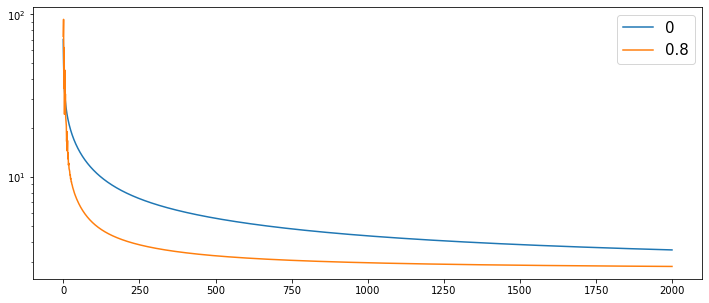

In [124]:
betas = [0,0.8]
plt.figure(figsize=(12,5))
for b in betas:
    results = linregression_GD(X,y,
                              learning_rate = 0.02,
                              momentum=b,
                              n_epochs=2000,
                              return_MSE=True)
    MSE = results['error']
    plt.semilogy(MSE, label=str(b))
plt.legend(fontsize=15)

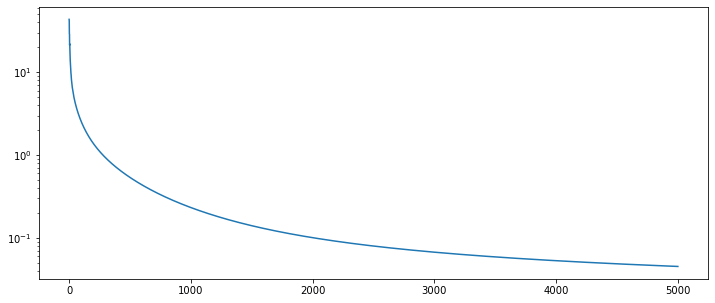

In [130]:
results = linregression_GD(X,y_0,
                           learning_rate = 0.02,
                           momentum=0.8,
                           n_epochs=5000,
                           return_MSE=True)
MSE = results['error']
plt.figure(figsize=(12,5))
plt.semilogy(MSE, label=str(b))

In [131]:
theta = results['coeff']

In [132]:
y_0_pred = X.dot(theta)

In [133]:
y_0_pred[y_0_pred>=0.5]=1
y_0_pred[y_0_pred<0.5] = 0

In [134]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_0,y_0_pred)

array([[4443,   78],
       [  43,  436]], dtype=int64)

## Test the linear regression model

In [186]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/digits_test.csv'
digits = pd.read_csv(url)

In [187]:
digits.head(1)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [188]:
col_names = ['pixel '+str(i) for i in range(784)]
col_names.append('label')
digits.columns = col_names
digits.head(1)

,pixel 0,pixel 1,pixel 2,pixel 3,pixel 4,pixel 5,pixel 6,pixel 7,pixel 8,pixel 9,...,pixel 775,pixel 776,pixel 777,pixel 778,pixel 779,pixel 780,pixel 781,pixel 782,pixel 783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8


In [190]:
digits.iloc[:,0:784] = digits.iloc[:,0:784]/255

In [ ]:
digits.to_csv('digits_')

In [191]:
X_test = digits.iloc[:,0:784].to_numpy()
y_test = digits.iloc[:,784].to_numpy()

In [192]:
X_test.max()

1.0

In [193]:
y_test_0 = np.zeros(len(y_test))
y_test_0[y_test==0] = 1

In [194]:
X_test = np.c_[np.ones(len(y_test)),X_test]

In [195]:
y_test_0_pred = X_test.dot(theta)

In [196]:
y_test_0_pred[y_test_0_pred>=0.5]=1
y_test_0_pred[y_test_0_pred<0.5]=0

In [197]:
confusion_matrix(y_test_0,y_test_0_pred)

array([[1759,   36],
       [  45,  160]], dtype=int64)